In [866]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

warnings.filterwarnings('ignore') #Filter Warning Messages
pd.set_option('display.max_columns',120) ## Set display limit for the columns 
pd.set_option('display.max_info_columns',120)# set display limit for Info columns


## Sourcing Loan.csv Data

In [867]:
# Step1: Importing the Loan.csv Dataset
raw=pd.read_csv('Data/loan.csv', low_memory=False)

In [868]:
# Step2: Checking the Shape of Loan.csv
raw.shape

(39717, 111)

In [869]:
# Step3: Checking Sample data of loan.csv
raw.head(2) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [870]:
# Step4: Checking the count of toal numerical and categorical columns in loan.csv

print('Total number of numeric Columns: {}'.format( len([col for col in raw if raw[col].dtype!='object'])))
print('Total number of categorical Columns: {}'.format( len([col for col in raw if raw[col].dtype=='object'])))


Total number of numeric Columns: 87
Total number of categorical Columns: 24


In [871]:
# Step 5: Checking Non-null information about  Loan.csv

In [872]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Cleansing 

#### Removing Duplicate Rows

In [873]:
raw_0=raw.drop_duplicates()

In [874]:
if raw.shape[0] == raw_0.shape[0]:
    print('No row level Duplicate Records Observed')
else :
    print('{} Duplicate Records were removed'.format(int(raw.shape[0])-int(raw_0.shape[0])))

No row level Duplicate Records Observed


## Null/Missing Value Analysis

In [963]:
nulls=pd.DataFrame([[ col for col in raw_0 if raw_0[col].isnull().sum() !=0],
      [ round((raw_0[col].isnull().sum())*100/len(raw_0)) for col in raw_0 if raw_0[col].isnull().sum() !=0]]).transpose()

In [876]:
nulls.columns=['column','freq']
nulls.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
column,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
freq,6,3,33,0,65,93,0,0,97,0,0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,2,0,100,100,100,100


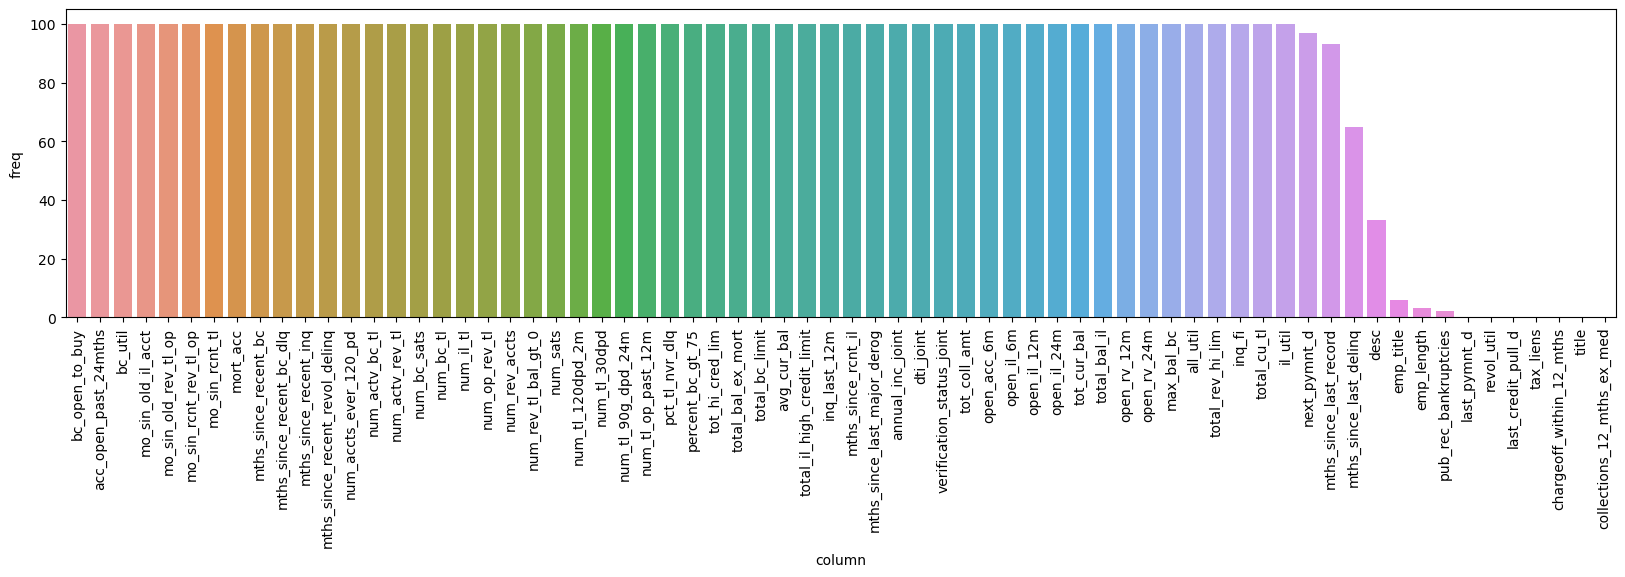

In [877]:
nulls.sort_values(by='freq',ascending=False,inplace=True)
nulls
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(data=nulls,x='column',y='freq', ax=ax)
plt.xticks(rotation=90)
plt.show()

Most of the columns has 100% null values and some seems to have nulls greater than 25% , these columns needs to be removed.

### Step 1: Removing Columns which are completely Null

#### Removing the Columns that are completely Null as they wont provide any information about customer's loan processing

In [878]:
#Removing Columns that are completely null

raw0=raw_0.dropna(how='all',axis=1) 

In [879]:
#Displaying Columns that are completly null

print ('\033[1m' + '\033[4m'+"Removed below columns that are completely Null which makes these columns insignifcant for Analysis:\n\n" +'\033[0m', end="") 
for col in raw:
    if col not in raw0:
        print(end = col +" , " )

Removed below columns that are completely Null which makes these columns insignifcant for Analysis:

mths_since_last_major_derog , annual_inc_joint , dti_joint , verification_status_joint , tot_coll_amt , tot_cur_bal , open_acc_6m , open_il_6m , open_il_12m , open_il_24m , mths_since_rcnt_il , total_bal_il , il_util , open_rv_12m , open_rv_24m , max_bal_bc , all_util , total_rev_hi_lim , inq_fi , total_cu_tl , inq_last_12m , acc_open_past_24mths , avg_cur_bal , bc_open_to_buy , bc_util , mo_sin_old_il_acct , mo_sin_old_rev_tl_op , mo_sin_rcnt_rev_tl_op , mo_sin_rcnt_tl , mort_acc , mths_since_recent_bc , mths_since_recent_bc_dlq , mths_since_recent_inq , mths_since_recent_revol_delinq , num_accts_ever_120_pd , num_actv_bc_tl , num_actv_rev_tl , num_bc_sats , num_bc_tl , num_il_tl , num_op_rev_tl , num_rev_accts , num_rev_tl_bal_gt_0 , num_sats , num_tl_120dpd_2m , num_tl_30dpd , num_tl_90g_dpd_24m , num_tl_op_past_12m , pct_tl_nvr_dlq , percent_bc_gt_75 , tot_hi_cred_lim , total_bal_ex




### Step 2: Removing Columns which has null values greater than 25%

In [880]:
# Checking the fill rate of the columns to identify records with maximum nulls.
# In general we assume that records with nulls greater than 25% will not be significant for the analysis

temp2=pd.DataFrame([[ col for col in raw0 if raw0[col].isnull().sum() > 0 ],
                    [ round(raw0[col].isnull().sum()*100/len(raw0),2) for col in raw0 if raw0[col].isnull().sum() > 0 ]] ).transpose()
temp2.columns=['column','freq']
temp2

,column,freq
0,emp_title,6.19
1,emp_length,2.71
2,desc,32.58
3,title,0.03
4,mths_since_last_delinq,64.66
5,mths_since_last_record,92.99
6,revol_util,0.13
7,last_pymnt_d,0.18
8,next_pymnt_d,97.13
9,last_credit_pull_d,0.01


In [881]:
## Removing Columns with null values greater than 25 %
raw1=raw0[[ col for col in raw0 if (raw0[col].count()/len(raw0)) >=0.25 ]] 

In [882]:
print ('\033[1m' +'\033[4m'+"Removed below Columns from Loan.csv, Since they have null values greater than 25%:"+'\033[0m')
for col in raw0:
    if col not in raw1:
        print('* ' + col )

Removed below Columns from Loan.csv, Since they have null values greater than 25%:
* mths_since_last_record
* next_pymnt_d


### Step 3: Removing Columns that would not have any influence over the Analysis of given problem statement

##### Removing the columns that defines 'Customer behaviour' after loan disbursement, which can't be used as a factor to determine the risk of providing loan to a customer

In [883]:
#Dropping insignificant columns

raw2=raw1.drop([ 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
                 'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type',
                 'revol_bal','revol_util','total_acc','out_prncp'], axis=1)


In [884]:
print ('\033[1m'+'\033[4m'+"The below columns were removed as they are insignificant for the analysis of given problem statement:\n\n"+'\033[0m' , end="") 
for col in raw1:
    if col not in raw2:
        print(end = col +" , " )

The below columns were removed as they are insignificant for the analysis of given problem statement:

delinq_2yrs , earliest_cr_line , inq_last_6mths , open_acc , pub_rec , revol_bal , revol_util , total_acc , out_prncp , out_prncp_inv , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int , total_rec_late_fee , recoveries , collection_recovery_fee , last_pymnt_d , last_pymnt_amnt , last_credit_pull_d , application_type , 

In [885]:
#Checking the number of Columns after cleansing the data

raw2.shape

(39717, 34)

In [886]:
raw2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,38.0,f,0.0,1,0,0.0,0,0.0,0.0


### Step 4 : Identifying columns whose values will not produce any outcome

In [887]:
raw2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,38.0,f,0.0,1,0,0.0,0,0.0,0.0


In [888]:
temp=[col for col in raw2 if raw2[col].isnull().sum()>0]
temp

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [889]:
# Creating Temporary dataframe for the remaining null values
temp=raw2[temp]


In [890]:
# Checking samples of the Remaining Null columns

temp.head()

,emp_title,emp_length,desc,title,mths_since_last_delinq,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,0.0,0.0,0.0,0.0
2,NaN,10+ years,NaN,real estate business,NaN,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.0,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,38.0,0.0,0.0,0.0,0.0


In [891]:
# Extracting the Value Counts of Ramaining null columns
for col in temp:
    val=temp[col].value_counts()
    print('\033[1m' + '\033[4m' +'Unique Value counts of '+ col +':' +'\n'+'\033[0m')
    print(val)
    print('\n')

Unique Value counts of emp_title:

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64


Unique Value counts of emp_length:

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Unique Value counts of desc:

                                                                                                                                                                          

In [892]:
# Removing the columns whose values are not showing any positive or negative outcome for the analysis
raw3=raw2.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths' ,'tax_liens'],axis=1)

In [893]:
raw3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,f,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,f,1,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,f,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,f,1,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,38.0,f,1,0,0,0.0


#### The below columns will not have any potential impact over the problem statemnet analysis 

* 'url': URL for the LC page with the listing data
* 'desc': Loan description provided by the borrower
* 'zip_code':The first 3 numbers of the zip code provided by the borrower in the loan application.
* 'id': A unique LC assigned ID for the loan listing.
* 'member_id': A unique LC assigned Id for the borrower member.
* 'pymnt_plan': Indicates if a payment plan has been put in place for the loan


In [894]:
# Removing the Identified Columns
raw3=raw3.drop(['url','desc' ,'zip_code','id','member_id','pymnt_plan'],axis=1)

#### Removing the columns whose values are not suffcient to decide any outcomes for the given probelm statement

In [895]:
temp =[ col for col in raw3 if raw3[col].nunique()==1]
raw[temp].head()

,initial_list_status,policy_code,acc_now_delinq,delinq_amnt
0,f,1,0,0
1,f,1,0,0
2,f,1,0,0
3,f,1,0,0
4,f,1,0,0


### The below Columns has values which will not influence the analysis

* 'pymnt_plan': Indicates if a payment plan has been put in place for the loan All loans have payment plan as 'n')
* 'initial_list_status': The initial listing status of the loan. Possible values are – W, F ( as per the Data all Loans are 'F')
* 'policy_code': publicly available policy_code=1
                 new products not publicly available policy_code=2
                 (As per the Data all products were publicly available)
* 'acc_now_delinq': The number of accounts on which the borrower is now delinquent.(All borrower has 0 delinquent loan                              accounts)
* 'delinq_amnt': The past-due amount owed for the accounts on which the borrower is now delinquent.(No amounts were owed by the borrower since all borrowers has 0 delinquent account)

In [896]:
raw3=raw3.drop(temp,axis=1)

In [897]:
raw3.shape

(39717, 21)

In [898]:
# Checking Null/Missing Values after Fixing Rows and Columns


temp=pd.DataFrame([[ col for col in raw3 if raw3[col].isnull().sum() > 0 ],
                    [ round(raw3[col].isnull().sum()*100/len(raw3),2) for col in raw3 if raw3[col].isnull().sum() > 0 ]] ).transpose()
temp.columns=['column','freq']
temp

,column,freq
0,emp_title,6.19
1,emp_length,2.71
2,title,0.03
3,mths_since_last_delinq,64.66
4,pub_rec_bankruptcies,1.75


#### Observations after fixing Rows/Columns:

* The final raw3 dataset for Loan.csv still has some null/missing values even after cleaning the Rows & Columns.
* This missing or null values will be replaced by using some data Imputation techniques
* Before Proceeding further with the imputation the Data types needs to be validated and changes had to be made wherever it is neccasary. 

### Data Type Check

In [899]:
# Checking the fill rate of the columns to identify the columns that require data imputation
raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [901]:
#Standardising all the Amounts Columns to Float Data type

raw3['loan_amnt']=raw3['loan_amnt'].astype(float)
raw3['funded_amnt']=raw3['funded_amnt'].astype(float)

raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  float64
 1   funded_amnt             39717 non-null  float64
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

#### The Data type of the below columns seems to be odd, these columns needs to be reviewed and assigned further with appropiate datatypes.

* term
* int_rate
* emp_length

In [902]:
# Checking Sample values of these columns
raw3[['term','int_rate','emp_length']].head()

,term,int_rate,emp_length
0,36 months,10.65%,10+ years
1,60 months,15.27%,< 1 year
2,36 months,15.96%,10+ years
3,36 months,13.49%,10+ years
4,60 months,12.69%,1 year


#### Data type correction of 'term' column:

In [903]:
raw3['term']=raw3['term'].str.replace('\D','')

In [904]:
raw3['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [905]:
raw3['term']=raw3['term'].astype(int)

#### Data type correction of 'int_rate' column:

In [906]:
raw3['int_rate']=raw3['int_rate'].str.replace('%','')

In [907]:
raw3['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [908]:
raw3['int_rate']=raw3['int_rate'].astype(float)

#### Data type correction of 'emp_length' column:

In [909]:
raw3['emp_length']=raw3['emp_length'].str.replace('\D','')

In [910]:
raw3['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

##### Observed null values in emp_length. Assigning nan to '0', Since the employment tenure was missing for some employess

In [911]:
raw3['emp_length']=raw3['emp_length'].fillna(0)

In [912]:
raw3['emp_length']=raw3['emp_length'].astype(int)

### Data Imputation 

In [913]:
# Checking Null/Missing Values after Fixing Rows and Columns


temp=pd.DataFrame([[ col for col in raw3 if raw3[col].isnull().sum() > 0 ],
                    [ round(raw3[col].isnull().sum()*100/len(raw3),2) for col in raw3 if raw3[col].isnull().sum() > 0 ]] ).transpose()
temp.columns=['column','freq']
temp

,column,freq
0,emp_title,6.19
1,title,0.03
2,mths_since_last_delinq,64.66
3,pub_rec_bankruptcies,1.75


#### Cleaning Missing/Null values in 'emp_title':

In [914]:
raw3['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

##### Assigning a new label called 'Unknown' to the missing Employment titles

In [915]:
raw3['emp_title']=raw3['emp_title'].fillna('Unknown')

In [916]:
raw3['emp_title'].value_counts()

Unknown                            2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28821, dtype: int64

#### Cleaning Missing/Null values in 'title':

In [917]:
raw3['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [918]:
raw3['title'].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

##### Assigning a new label called 'Unknown_title' to the missing Employment titles

In [919]:
raw3['title']=raw3['title'].fillna('Unknown_title')

#### Cleaning Missing/Null values in 'mths_since_last_delinq':

In [920]:
#Checking Fill Rate
raw3['mths_since_last_delinq'].value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [921]:
# Describing the median
raw3['mths_since_last_delinq'].describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [922]:
#Assigning Median values to the missing columns
msld_median=raw3['mths_since_last_delinq'].median()

raw3['mths_since_last_delinq']=raw3['mths_since_last_delinq'].fillna(msld_median)

#### Cleaning Missing/Null values in 'pub_rec_bankruptcies':

In [923]:
raw3['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [924]:
raw3['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [925]:
#Assigning Median values to the missing columns
prb=raw3['pub_rec_bankruptcies'].median()
raw3['pub_rec_bankruptcies']=raw3['pub_rec_bankruptcies'].fillna(prb)

### Null Record Check After Data Cleanising

In [926]:
raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  float64
 1   funded_amnt             39717 non-null  float64
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  int64  
 4   int_rate                39717 non-null  float64
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               39717 non-null  object 
 9   emp_length              39717 non-null  int64  
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

### Toal numerical and categorical columns after Data Cleanising

In [927]:
print('Total number of numeric Columns: {}'.format( len([col for col in raw3 if raw3[col].dtype!='object'])))
print('Total number of categorical Columns: {}'.format( len([col for col in raw3 if raw3[col].dtype=='object'])))


Total number of numeric Columns: 11
Total number of categorical Columns: 10


In [928]:
raw3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,34.0,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,34.0,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,34.0,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,35.0,0.0
4,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,38.0,0.0


#### Data Observation:
Afte looking in to the loan status (Fully paid, charged Off, current ), the loan data which are currently active can be excluded since they don't have an outcome for the analysis. Final dataset will be filtered with Fully paid (customers who have paid their loan completely) and charged off (customers who defaulted their loan and charged off for the same)

In [930]:
raw4=raw3[~(raw3['loan_status']=='Current')]

In [931]:
raw4.shape

(38577, 21)

# Data Analysis

### Check Points:
Checking for outliers from the applicable columns to remove any outlier that will deviate the analysis and may affect the final model

In [940]:
raw4.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')

### Data Distribution analysis for the below Loan Amounts:

* loan_amnt:The Loan amount is the initally requested amount by the customer as per his requirmenet
* funded_amnt:The funded amount is the amount proposed by the lending club after analysing the potential risks for that customers and his portfolio.
* funded_amnt_inv: The total loan amount processed by the Investor as per their organizations financial threshold and norms.

In [942]:
raw4.shape

(38577, 21)

In [944]:
raw4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,34.0,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,34.0,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,34.0,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,35.0,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,34.0,0.0


In [ ]:
raw4['int_rate'].value_counts()

In [960]:
raw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  float64
 1   funded_amnt             38577 non-null  float64
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  int64  
 4   int_rate                38577 non-null  float64
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_title               38577 non-null  object 
 9   emp_length              38577 non-null  int64  
 10  home_ownership          38577 non-null  object 
 11  annual_inc              38577 non-null  float64
 12  verification_status     38577 non-null  object 
 13  issue_d                 38577 non-null  object 
 14  loan_status             38577 non-null

In [966]:

Numerical=[col for col in raw3 if raw3[col].dtype!='object']
Categorical=[col for col in raw3 if raw3[col].dtype=='object']


['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'mths_since_last_delinq',
 'pub_rec_bankruptcies']

In [971]:
Numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'mths_since_last_delinq',
 'pub_rec_bankruptcies']

In [994]:
raw4['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

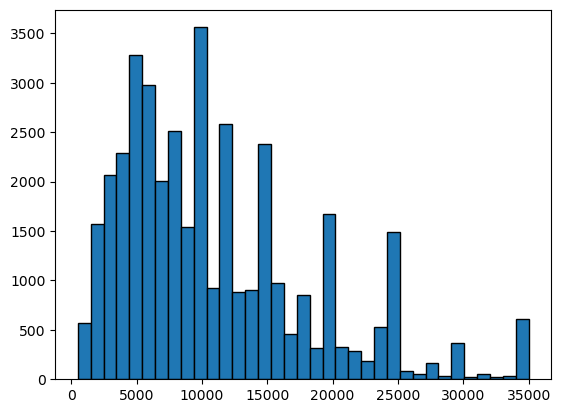

In [1002]:
plt.hist(raw4['loan_amnt'],bins=35,edgecolor='black')
plt.show()

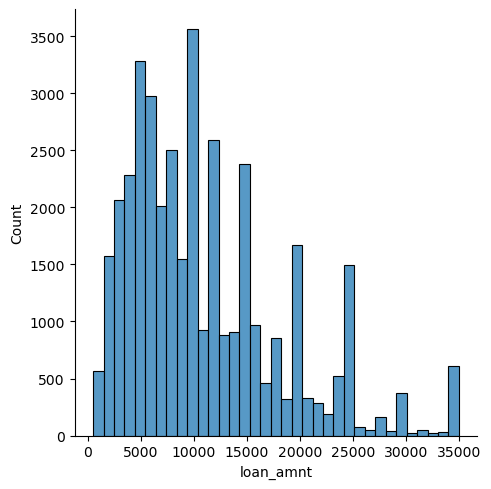

In [990]:
sns.displot(raw4['loan_amnt'],bins=35)
plt.show()

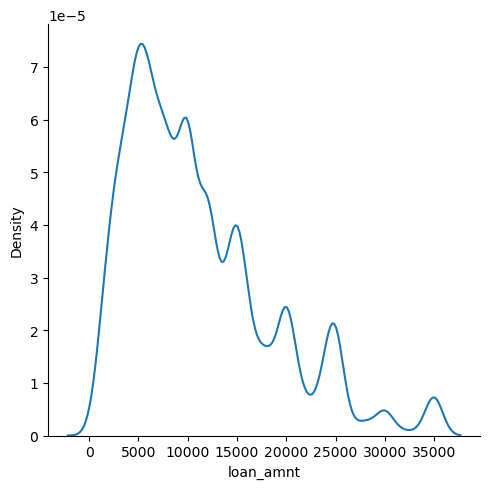

In [993]:
sns.displot(data=raw4,x='loan_amnt',kind='kde')
plt.show()

## Observations for Loan Amount:

* The values lies in between 500 -35000
* Maximum Density Lies arround 25% (in between 5000 -10000)

## Univariate - term

In [1008]:
raw4['term'].describe()

count    38577.000000
mean        41.898437
std         10.333136
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

In [1010]:
round(raw4['term'].value_counts()*100/len(raw4['term']))

36    75.0
60    25.0
Name: term, dtype: float64

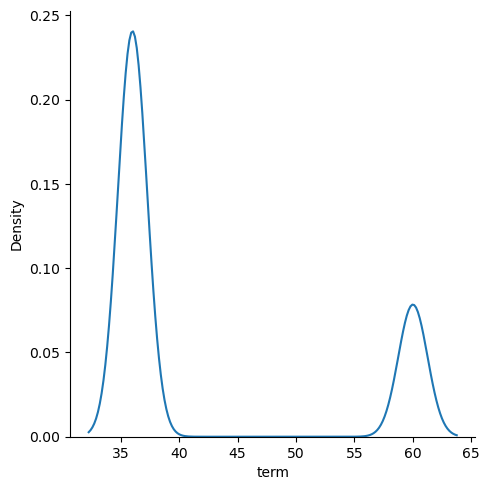

In [1006]:
sns.displot(data=raw4,x='term',kind='kde')
plt.show()

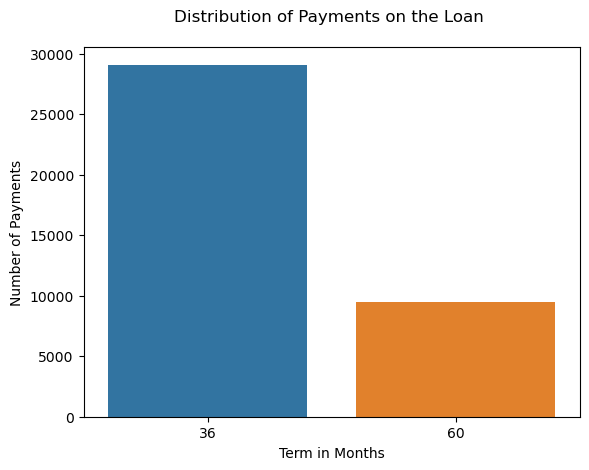

In [1017]:
sns.countplot(x ='term', data = raw4)
plt.xlabel('Term in Months')
plt.ylabel('Number of Payments')
plt.title('Distribution of Payments on the Loan \n')
# Show the plot
plt.show()

## Observation
* 75% of the loans are for term 36 month

# Univariate For  'Interest Rate' (int_rate)

In [1020]:
raw4.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

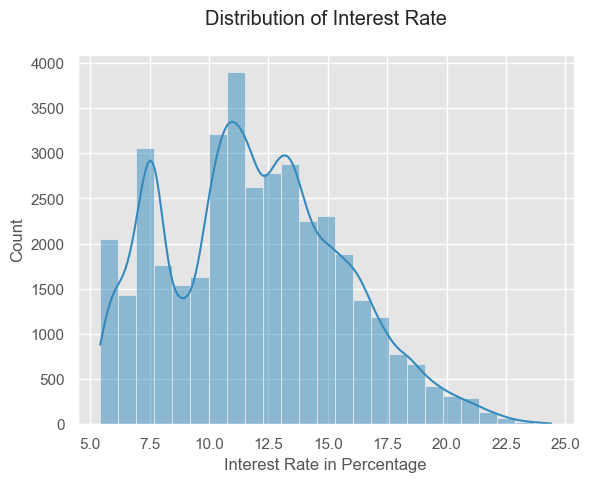

In [1048]:

#sns.set_theme(style="whitegrid", palette="pastel")

plt.style.use("ggplot")
sns.histplot(data=raw4, x='int_rate',bins=25,kde=True)
plt.xlabel('Interest Rate in Percentage')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate\n')
plt.show()

## Observation

 Majority of loans are lying in the range of these interest rates
* 7-8%
* 11-12%

## Univariate for Emp_length

In [1052]:
raw4['emp_length'].describe()

count    38577.000000
mean         4.925526
std          3.453921
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

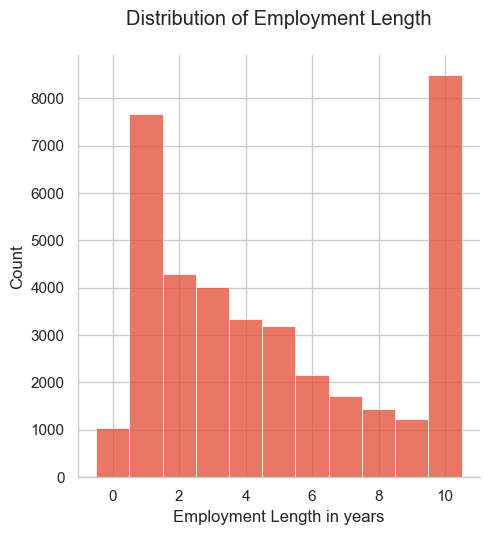

In [1073]:

sns.set_style('whitegrid')
#plt.style.use("white")
sns.displot(data=raw4, x='emp_length',bins=[0,1, 2, 3, 4, 5, 6, 7,8,9,10],discrete=True)
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length\n')
plt.show()

## Observation 

* Distribution of data is maximum for people who has 10 years of employment length
* We have explicitly converted the < 1 year to 1 and null data's to 0.


## Univariate for Annual Income
 'dti',
 'mths_since_last_delinq',
 'pub_rec_bankruptcies

In [1104]:
raw4['annual_inc'].value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: annual_inc, Length: 5215, dtype: int64

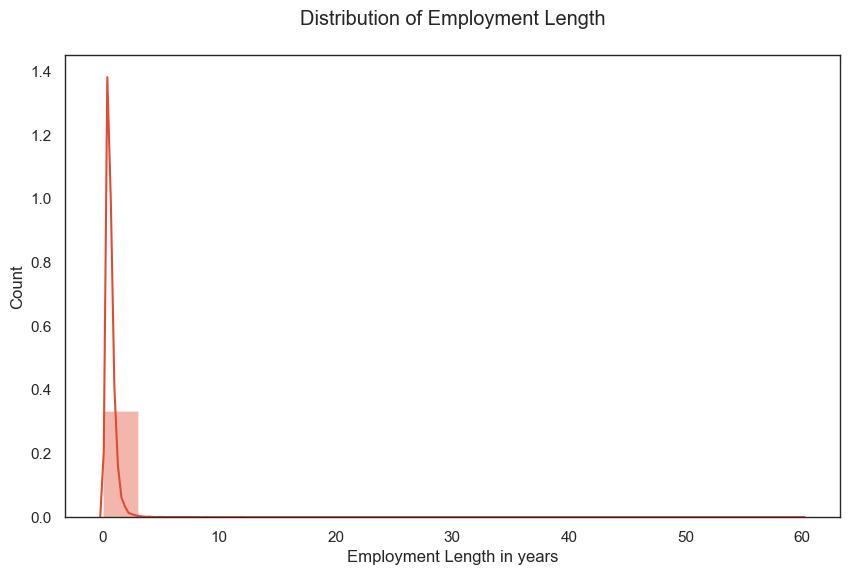

In [1112]:

#sns.set_style('white')
#plt.style.use("white")
plt.figure(figsize=(10, 6))
sns.distplot(raw4['annual_inc'].astype(int)/100000,bins=20)

#plt.hist(data=raw4,x='annual_inc')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length\n')
plt.show()

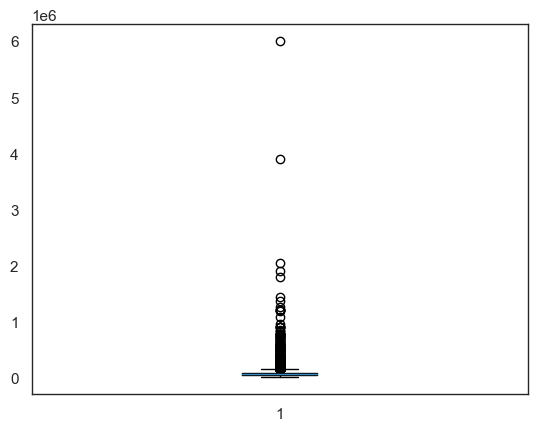

In [1107]:


plt.boxplot(raw4.annual_inc)
plt.show()


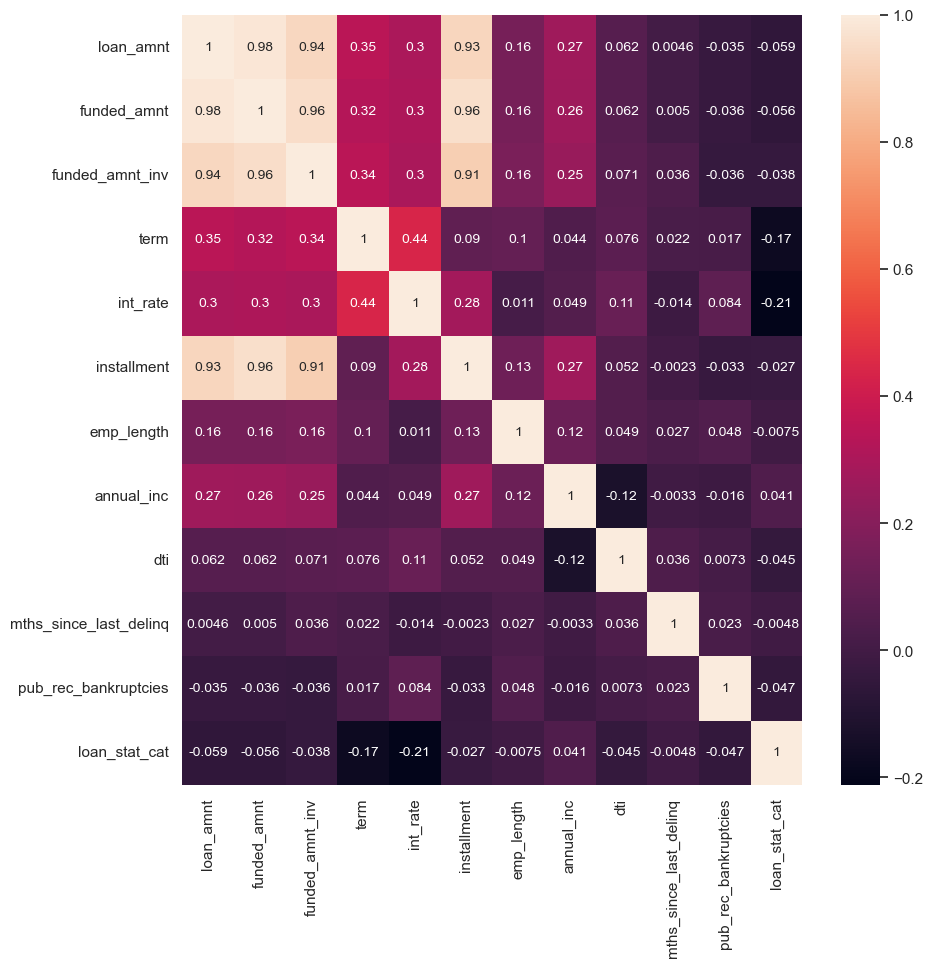

In [1121]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw4.corr(),annot=True)
plt.show()

In [1116]:
raw4['loan_stat_cat']=raw4['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

In [1118]:
raw4['loan_stat_cat'].value_counts()

1    32950
0     5627
Name: loan_stat_cat, dtype: int64

In [1120]:
raw4['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64